#TRABAJO PRÁCTICO DE INCIDENTES VIALES

Modelos Supervisados

In [95]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
# LIBRERIAS PARA PREDICCION DE DATOS
from sklearn import linear_model, neural_network, ensemble
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier

# LIBRERIAS PARA BALANCEO SEPARACION Y ANALISIS
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report,  mean_squared_error, r2_score, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
df=pd.read_csv("/content/drive/MyDrive/Acc_ok.csv", sep="," )

In [69]:
print(df.shape)

(232872, 19)


In [70]:
df.head(10)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,2014-01-01,00:15:00,Otro,CR 49 CL 72,M,17.0,Motociclista,Ene,Mié,1.0,0.0,10 - 19,2014,1423940.0,6.266915,-75.559099,04 - Aranjuez,Manrique Central No. 1
1,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,M,20.0,Motociclista,Ene,Mié,1.0,0.0,20 - 29,2014,1423921.0,6.289353,-75.553292,01 - Popular,Moscú No. 2
2,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,F,18.0,Peatón,Ene,Mié,1.0,0.0,10 - 19,2014,1423921.0,6.289353,-75.553292,01 - Popular,Moscú No. 2
3,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,19.0,Motociclista,Ene,Mié,1.0,0.0,10 - 19,2014,1423849.0,6.234327,-75.607611,16 - Belén,Las Mercedes
4,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,39.0,Peatón,Ene,Mié,1.0,0.0,30 - 39,2014,1423849.0,6.234327,-75.607611,16 - Belén,Las Mercedes
5,Heridos,2014-01-01,00:50:00,Atropello,CR 53 CL 61,M,44.0,Peatón,Ene,Mié,1.0,0.0,40 - 49,2014,1423839.0,6.260009,-75.568185,10 - La Candelaria,Jesús Nazareno
6,Heridos,2014-01-01,01:00:00,Atropello,CR 39 CL 70,M,7.0,Peatón,Ene,Mié,1.0,1.0,0 - 9,2014,1423840.0,6.264765,-75.549943,03 - Manrique,Manrique Oriental
7,Heridos,2014-01-01,01:20:00,Choque,CR 86 C CL 76 DD,M,18.0,Motociclista,Ene,Mié,1.0,1.0,10 - 19,2014,1423912.0,6.281797,-75.591982,07 - Robledo,Villa Flora
8,Heridos,2014-01-01,01:20:00,Choque,CR 86 C CL 76 DD,F,17.0,Acompañante de Motocicleta,Ene,Mié,1.0,1.0,10 - 19,2014,1423912.0,6.281797,-75.591982,07 - Robledo,Villa Flora
9,Heridos,2014-01-01,01:30:00,Choque,CR 78 CL 47 D,M,35.0,Motociclista,Ene,Mié,1.0,1.0,30 - 39,2014,1423897.0,6.257979,-75.595777,11 - Laureles Estadio,U.D. Atanasio Girardot


In [71]:
df.tail(10)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
232862,Heridos,2021-09-30,19:00:00,Choque,CR 51 CL 49,M,31.0,Ciclista,Sept,Jue,30.0,19.0,30 - 39,2021,1763921.0,6.248936,-75.568866,10 - La Candelaria,La Candelaria
232863,Heridos,2021-09-30,19:00:00,Choque,CR 51 CL 49,M,27.0,Motociclista,Sept,Jue,30.0,19.0,20 - 29,2021,1763921.0,6.248936,-75.568866,10 - La Candelaria,La Candelaria
232864,Heridos,2021-09-30,20:00:00,Otro,CR 34 CL 72,F,29.0,Motociclista,Sept,Jue,30.0,20.0,20 - 29,2021,1763941.0,NaN,NaN,NaN,NaN
232865,Heridos,2021-09-30,20:00:00,Otro,CL 97 CR 85,F,44.0,Motociclista,Sept,Jue,30.0,20.0,40 - 49,2021,1763939.0,6.298268,-75.585992,06 - Doce de Octubre,Picachito
232866,Heridos,2021-09-30,20:40:00,Choque,CR 48 CL 16 A,F,38.0,Motociclista,Sept,Jue,30.0,20.0,30 - 39,2021,1763788.0,6.217895,-75.575824,14 - El Poblado,Villa Carlota
232867,Heridos,2021-09-30,22:00:00,Otro,CL 54 CR 9 A,M,32.0,Motociclista,Sept,Jue,30.0,22.0,30 - 39,2021,1764135.0,6.234267,-75.536311,08 - Villa Hermosa,Las Estancias
232868,Heridos,2021-09-30,22:00:00,Otro,CL 54 CR 9 A,F,29.0,Acompañante de Motocicleta,Sept,Jue,30.0,22.0,20 - 29,2021,1764135.0,6.234267,-75.536311,08 - Villa Hermosa,Las Estancias
232869,Heridos,2021-09-30,22:00:00,Caida Ocupante,CL 81 CR 39,M,41.0,Acompañante de Motocicleta,Sept,Jue,30.0,22.0,40 - 49,2021,1763968.0,6.272697,-75.548675,03 - Manrique,Santa Inés
232870,Heridos,2021-09-30,23:00:00,Atropello,CR 63 CL 32,F,51.0,Peatón,Sept,Jue,30.0,23.0,50 - 59,2021,1764133.0,NaN,NaN,NaN,NaN
232871,Heridos,2021-09-30,23:00:00,Otro,CR 107 CL 65,M,23.0,Motociclista,Sept,Jue,30.0,23.0,20 - 29,2021,1763946.0,NaN,NaN,NaN,NaN


In [72]:
df.dtypes

Gravedad_victima        object
Fecha_incidente         object
Hora_incidente          object
Clase_incidente         object
Direccion_incidente     object
Sexo                    object
Edad                   float64
Condicion               object
Mes                     object
Dia                     object
Num_dia                float64
Hora                   float64
Grupo_edad              object
Año                      int64
Radicado               float64
Latitud                float64
Longitud               float64
Comuna                  object
Barrio                  object
dtype: object

In [73]:
df['Edad'] = df['Edad'].astype('int64')

In [74]:
#se cambia fecha de incidente a datetime
df['Fecha_incidente']= pd.to_datetime(df['Fecha_incidente'])
df.dtypes

Gravedad_victima               object
Fecha_incidente        datetime64[ns]
Hora_incidente                 object
Clase_incidente                object
Direccion_incidente            object
Sexo                           object
Edad                            int64
Condicion                      object
Mes                            object
Dia                            object
Num_dia                       float64
Hora                          float64
Grupo_edad                     object
Año                             int64
Radicado                      float64
Latitud                       float64
Longitud                      float64
Comuna                         object
Barrio                         object
dtype: object

In [75]:
# Número de datos ausentes por variable
df.isna().sum().sort_values()

Gravedad_victima           0
Año                        0
Mes                        0
Condicion                  0
Edad                       0
Dia                        0
Clase_incidente            0
Hora_incidente             0
Fecha_incidente            0
Sexo                       0
Num_dia                    1
Hora                       7
Grupo_edad                11
Direccion_incidente       12
Radicado                  47
Latitud                20494
Longitud               20494
Comuna                 20495
Barrio                 20955
dtype: int64

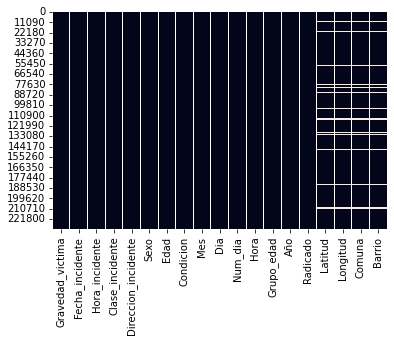

In [76]:
# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

Cómo se observa en el detalle de arriba, los datos faltantes son de las columnas 'Latitud', 'Longitud', 'Comuna' y 'Barrio'; lo que hace difícil imputar estos valores en base a los otros, por lo tanto se procede a eliminar las filas faltantes.

In [77]:
df = df.dropna(subset=['Latitud'], axis=0)
df.isnull().sum()

Gravedad_victima         0
Fecha_incidente          0
Hora_incidente           0
Clase_incidente          0
Direccion_incidente      6
Sexo                     0
Edad                     0
Condicion                0
Mes                      0
Dia                      0
Num_dia                  1
Hora                     5
Grupo_edad              11
Año                      0
Radicado                43
Latitud                  0
Longitud                 0
Comuna                   2
Barrio                 461
dtype: int64

In [78]:
df = df.dropna(subset=['Barrio'], axis=0)
df.isnull().sum()

Gravedad_victima        0
Fecha_incidente         0
Hora_incidente          0
Clase_incidente         0
Direccion_incidente     6
Sexo                    0
Edad                    0
Condicion               0
Mes                     0
Dia                     0
Num_dia                 1
Hora                    4
Grupo_edad             11
Año                     0
Radicado               40
Latitud                 0
Longitud                0
Comuna                  0
Barrio                  0
dtype: int64

In [79]:
df = df.dropna(axis=0)
df.isnull().sum()

Gravedad_victima       0
Fecha_incidente        0
Hora_incidente         0
Clase_incidente        0
Direccion_incidente    0
Sexo                   0
Edad                   0
Condicion              0
Mes                    0
Dia                    0
Num_dia                0
Hora                   0
Grupo_edad             0
Año                    0
Radicado               0
Latitud                0
Longitud               0
Comuna                 0
Barrio                 0
dtype: int64

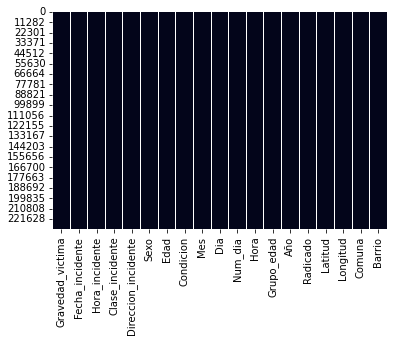

In [80]:
sns.heatmap(df.isnull(), cbar=False)

Ahora nuestro set de datos no tiene valores nulos.



---
Ahora trabajo tanto en la variable objetivo como en las predictoras pasando a numéricos sus valores para poder modelarlos con algoritmos supervisados


#Selección de Features

Las columnas que se consideran como predictoras son:

*Clase_incidente

*Sexo

*Edad	

*Condicion

*Año

*Comuna.


In [81]:
df = df.drop(['Fecha_incidente', 'Hora_incidente', 'Direccion_incidente', 'Grupo_edad', 'Hora', 'Radicado', 'Latitud', 'Longitud','Mes','Dia','Num_dia',	'Hora','Barrio' ], axis=1)
df

,Gravedad_victima,Clase_incidente,Sexo,Edad,Condicion,Año,Comuna
0,Heridos,Otro,M,17,Motociclista,2014,04 - Aranjuez
1,Heridos,Atropello,M,20,Motociclista,2014,01 - Popular
2,Heridos,Atropello,F,18,Peatón,2014,01 - Popular
3,Heridos,Atropello,M,19,Motociclista,2014,16 - Belén
4,Heridos,Atropello,M,39,Peatón,2014,16 - Belén
...,...,...,...,...,...,...,...
232865,Heridos,Otro,F,44,Motociclista,2021,06 - Doce de Octubre
232866,Heridos,Choque,F,38,Motociclista,2021,14 - El Poblado
232867,Heridos,Otro,M,32,Motociclista,2021,08 - Villa Hermosa
232868,Heridos,Otro,F,29,Acompañante de Motocicleta,2021,08 - Villa Hermosa


In [82]:
dummies = pd.get_dummies(df['Gravedad_victima'])
dummies.head(20)

,Heridos,Muertos
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [83]:
# Eliminamos la variable muertos
dummies = dummies.drop(columns=['Muertos'])

Lo que voy a predecir es la gravedad de la víctima en un incidente vial, tomando a Herido=1 y Muerto=0.

In [84]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

In [85]:
df=df.drop(columns=['Gravedad_victima'])
df.rename({'Heridos': 'Gravedad_victima'}, axis=1,inplace=True)
df

,Clase_incidente,Sexo,Edad,Condicion,Año,Comuna,Gravedad_victima
0,Otro,M,17,Motociclista,2014,04 - Aranjuez,1
1,Atropello,M,20,Motociclista,2014,01 - Popular,1
2,Atropello,F,18,Peatón,2014,01 - Popular,1
3,Atropello,M,19,Motociclista,2014,16 - Belén,1
4,Atropello,M,39,Peatón,2014,16 - Belén,1
...,...,...,...,...,...,...,...
232865,Otro,F,44,Motociclista,2021,06 - Doce de Octubre,1
232866,Choque,F,38,Motociclista,2021,14 - El Poblado,1
232867,Otro,M,32,Motociclista,2021,08 - Villa Hermosa,1
232868,Otro,F,29,Acompañante de Motocicleta,2021,08 - Villa Hermosa,1


In [86]:
encoder = LabelEncoder()

df["Clase_incidente"] = encoder.fit_transform(df["Clase_incidente"])
df['Sexo']=encoder.fit_transform(df["Sexo"])
df['Condicion']=encoder.fit_transform(df["Condicion"])
df['Comuna']=encoder.fit_transform(df["Comuna"])



In [87]:
df

,Clase_incidente,Sexo,Edad,Condicion,Año,Comuna,Gravedad_victima
0,4,1,17,3,2014,3,1
1,0,1,20,3,2014,0,1
2,0,0,18,5,2014,0,1
3,0,1,19,3,2014,15,1
4,0,1,39,5,2014,15,1
...,...,...,...,...,...,...,...
232865,4,0,44,3,2021,5,1
232866,2,0,38,3,2021,13,1
232867,4,1,32,3,2021,7,1
232868,4,0,29,0,2021,7,1


Creamos una copia del set de datos así luego los separamos en train y test

In [88]:
# Guardamos el dataframe/
df.to_csv('/content/drive/MyDrive/new_df.csv', index=None)

In [89]:
new_df=pd.read_csv("/content/drive/MyDrive/new_df.csv", sep="," )

In [90]:
y=new_df.Gravedad_victima
X = new_df.drop('Gravedad_victima',axis=1)
y, X

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 211850    1
 211851    1
 211852    1
 211853    1
 211854    1
 Name: Gravedad_victima, Length: 211855, dtype: int64,
         Clase_incidente  Sexo  Edad  Condicion   Año  Comuna
 0                     4     1    17          3  2014       3
 1                     0     1    20          3  2014       0
 2                     0     0    18          5  2014       0
 3                     0     1    19          3  2014      15
 4                     0     1    39          5  2014      15
 ...                 ...   ...   ...        ...   ...     ...
 211850                4     0    44          3  2021       5
 211851                2     0    38          3  2021      13
 211852                4     1    32          3  2021       7
 211853                4     0    29          0  2021       7
 211854                1     1    41          0  2021       2
 
 [211855 rows x 6 columns])

La variable objetivo muestra una clase mayoritaría que será tratada alñ momento de correr los modelos supervisados

En este caso creo que no es necesario estandarizar los datos ya que la mayoría de ellos eran datos categóricos y se han pasado a numérico medias métodos de encoder.



---



Ahora analizamos nuestra variable objetivo que es 'Gravedad_victima' en donde la cantidad de 'Heridos' es la clase mayoritaría.:

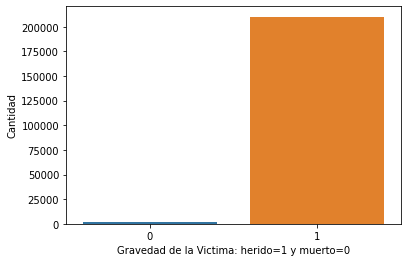

In [91]:
sns.countplot(y)
plt.xlabel('Gravedad de la Victima: herido=1 y muerto=0');
plt.ylabel('Cantidad');
plt.show()

In [92]:
y = y.to_numpy()
X = X.to_numpy()

y.shape, X.shape

((211855,), (211855, 6))

Dividimos el set de datos en entrenamiento y test

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169484, 6), (42371, 6), (169484,), (42371,))



---


Arboles de Desición

Corro un modelo de Árbol de Decisión para ver como se comporta el modelo teniendo la variable objetivo desbalanceada

In [97]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))

    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 99.41%
Accuracy test Árbol de decisión: 98.51%




---


Ejecutamos con un modelo Random Forest

In [99]:
# Análisis del modelo en TEST
clf = ensemble.RandomForestClassifier(criterion= "gini", n_estimators=50, random_state=2)
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       342
           1       0.99      1.00      1.00     42029

    accuracy                           0.99     42371
   macro avg       0.50      0.50      0.50     42371
weighted avg       0.98      0.99      0.99     42371



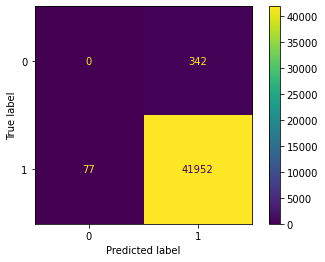

In [100]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()



---


Balancear nuestra Varibale Objetivo

Una de las estrategias para tratar de mejorar la situación es crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Esto lo logramos con la función RandomOverSampler() que duplicar aleatoriamente los ejemplos en la clase minoritaria.

In [104]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 168102
Before OverSampling, counts of label '0': 1382 

After OverSampling, the shape of train_X: (336204, 6)
After OverSampling, the shape of train_y: (336204,) 

After OverSampling, counts of label '1': 168102
After OverSampling, counts of label '0': 168102


Volvemos a correr algoritmos luego de balancear y generar data sintética.

In [113]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(X_train_res, y_train_res)
    train_predictions = clf.predict(X_train_res)
    accuracy = accuracy_score(y_train_res, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))

    trained_models.append(clf)
    accuracy_models.append(accuracy*100)


Árbol de decisión
Accuracy train Árbol de decisión: 95.27%
Accuracy test Árbol de decisión: 89.83%


In [114]:
# Random Forest con la data balanceada
clf = ensemble.RandomForestClassifier(criterion= "gini", n_estimators=50, random_state=2)
clf.fit(X_train_res, y_train_res);
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.02      0.21      0.03       342
           1       0.99      0.91      0.95     42029

    accuracy                           0.90     42371
   macro avg       0.51      0.56      0.49     42371
weighted avg       0.99      0.90      0.94     42371

